In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/VAL_Q3_Mammogram_Page_3.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df = df.set_index('Date')

variable = df.columns[0]

print(df.shape, '\n')
df.head()

print(df.isnull().sum())
df[variable].fillna(0, inplace=True)
print(df.isnull().sum())

(395, 1) 

Event count    15
dtype: int64
Event count    0
dtype: int64


<Axes: xlabel='Date'>

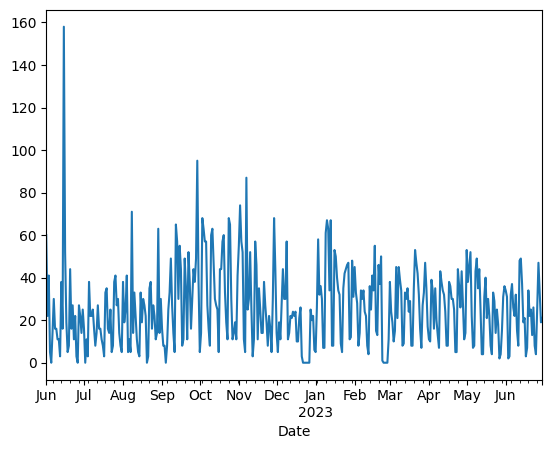

In [ ]:
df[variable].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print('1. ADF : ', dftest[0])
  print('2. P-value : ', dftest[1])
  print('3. Number of Lags : ', dftest[2])
  print('4. Number of Observation Used for ADF and Critical Values : ', dftest[3])
  print('5. Critical Values : ')
  for key, val in dftest[4].items():
    print('\t', key, ': ', val)

In [ ]:
ad_test(df[variable])

1. ADF :  -3.1211089286593614
2. P-value :  0.02502996275064988
3. Number of Lags :  13
4. Number of Observation Used for ADF and Critical Values :  381
5. Critical Values : 
	 1% :  -3.4476305904172904
	 5% :  -2.869155980820355
	 10% :  -2.570827146203181


In [ ]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

In [ ]:
print(df.shape)
test_size = 0.2
split = int(len(df) * test_size)
# Split the data into training and testing sets
train = df.iloc[:-split]
test = df.iloc[-split:]
print(train.shape, test.shape)

(395, 1)
(316, 1) (79, 1)


In [ ]:
import itertools

# Define the range of p, d, q values to try
p_values = range(0, 12)
d_values = range(0, 2)
q_values = range(0, 12)

# Initialize variables to store the best values
best_aic = float("inf")
best_pdq = None

# Generate all possible combinations of p, d, q values
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Loop through each combination and calculate AIC
for pdq in pdq_combinations:
    try:
        # Create and fit the ARIMA model using the training data for the current pdq combination
        model = sm.tsa.arima.ARIMA(train[variable], order=pdq)
        model = model.fit()

        # Calculate AIC for the current model
        current_aic = model.aic

        # Check if the current AIC is lower than the previous best AIC
        if current_aic < best_aic:
            best_aic = current_aic
            best_pdq = pdq
    except:
        continue

# Print the best (p, d, q) combination and its corresponding AIC score
print("Best (p, d, q) combination:", best_pdq)
print("Best AIC score:", best_aic)

Best (p, d, q) combination: (8, 1, 8)
Best AIC score: 2657.696900869999


In [ ]:
# Build the model
model = sm.tsa.arima.ARIMA(train[variable], order=best_pdq)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Event count   No. Observations:                  316
Model:                 ARIMA(8, 1, 8)   Log Likelihood               -1311.848
Date:                Tue, 26 Sep 2023   AIC                           2657.697
Time:                        19:53:00   BIC                           2721.491
Sample:                    06-01-2022   HQIC                          2683.185
                         - 04-12-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0004      0.174     -0.002      0.998      -0.341       0.340
ar.L2         -0.1183      0.084     -1.400      0.161      -0.284       0.047
ar.L3         -0.0538      0.091     -0.589      0.556      -0.233       0.125
ar.L4         -0.1359      0.091     -1.500      0.134      -0.313       0.042
ar.L5         -0.0462      0.094     -0.491      0.623      -0.231       0.138
ar.L6         -0.1103      0.083     -1.324      0.186      -0.274       0.053
ar.L7          0.8981      0.094      9.539      0.000       0.714       1.083
ar.L8         -0.0622      0.105     -0.592      0.554      -0.268       0.144
ma.L1         -0.7688      0.175     -4.398      0.000      -1.111      -0.426
ma.L2          0.0258      0.075      0.342      0.732      -0.122       0.173
ma.L3         -0.0533      0.056     -0.955      0.339      -0.163       0.056
ma.L4          0.1327      0.056      2.389      0.017       0.024       0.242
ma.L5         -0.1318      0.061     -2.152      0.031      -0.252      -0.012
ma.L6          0.0714      0.066      1.082      0.279      -0.058       0.201
ma.L7         -0.9360      0.075    -12.536      0.000      -1.082      -0.790
ma.L8          0.6744      0.163      4.125      0.000       0.354       0.995
sigma2       234.9245     16.033     14.653      0.000     203.501     266.348
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1707.18
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             1.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Make predictions on the entire dataset (both training and testing sets)
#start = 0
#end = len(train) + len(test) - 1
#pred = model.predict(start=start, end=end, typ='levels')
#pred.index = df.index[start:end + 1]
#df_pred = pd.DataFrame(pred)

In [ ]:
#df_pred

# Resample the data by month and calculate the mean for each month
#monthly_mean = df_pred.resample('M').mean()

# Print the monthly mean
#print(monthly_mean)


In [ ]:
# Make predictions on Testing set
start=len(train)
end=len(train) + len(test) -1
pred = model.predict(start=start, end=end, typ='levels')
pred.index = df.index[start:end + 1]
df_pred = pd.DataFrame(pred)
df_pred.tail()

,predicted_mean
Date,
2023-06-26,29.296518
2023-06-27,40.968964
2023-06-28,32.862532
2023-06-29,37.029173
2023-06-30,19.752462


In [ ]:
test.tail()

,Event count
Date,
2023-06-26,26.0
2023-06-27,47.0
2023-06-28,33.0
2023-06-29,19.0
2023-06-30,21.0


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the testing set
test_pred = model.predict(start=start, end=end, typ='levels')
test_pred.index = df.index[start:end + 1]

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(test[variable], test_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate R-squared score
r_squared = r2_score(test[variable], test_pred)
print("R-squared Score:", r_squared)

Mean Absolute Percentage Error (MAPE): 66.63076880965629
R-squared Score: 0.5781372376916077


<Axes: xlabel='Date'>

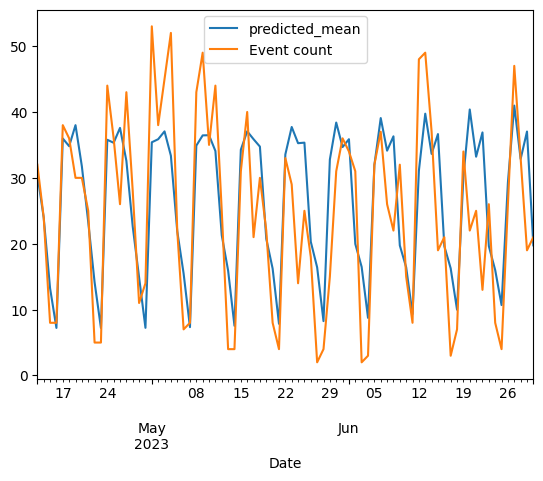

In [ ]:
pred.plot(legend=True)
test[variable].plot(legend=True)

In [ ]:
test[variable].mean()

24.544303797468356

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred, test[variable]))
print(rmse)

9.184172759137137


In [ ]:
model2=sm.tsa.arima.ARIMA(df[variable], order=best_pdq)
model2=model2.fit()

# Q3 Daily Forecasts

In [ ]:
# Predict
pd.options.display.max_rows = 4000
index_future_dates=pd.date_range(start='2023-07-01', end='2023-09-30')
pred=model2.predict(start=len(df), end=len(df) + 61, typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
frame = pd.DataFrame(pred)
frame

# Q3 Monthly Forecast

In [ ]:
# Resample the data by month and calculate the mean for each month
monthly_mean = frame.resample('M').mean()

# Print the monthly mean
print(monthly_mean)
